In [81]:
import sys

import pandas as pd

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [82]:
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from structs.res import AppRes

In [104]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10

In [105]:
code = "7011"
dir_log = "20251123071955"
csv_log = "progress.csv"
metric = "ep_len_mean"

In [106]:
res = AppRes()
path_dir_log = os.path.join("..", res.dir_log, code, dir_log)
list_dir_date = sorted(os.listdir(path_dir_log))
path_png = os.path.join("..", "screenshots", f"{dir_log}_{metric}.png")
path_png

'../screenshots/20251123071955_ep_len_mean.png'

In [107]:
list_df = list()
pattern1 = re.compile(r"(.{4})(.{2})(.{2})")
for dir_date in list_dir_date:
    if m := pattern1.match(dir_date):
        date_str = f"{m.group(1)}-{m.group(2)}-{m.group(3)}"
    else:
        date_str = "1970-01-01"
    # dt = pd.to_datetime(date_str)
    path_csv = os.path.join(path_dir_log, dir_date, csv_log)
    df_csv = pd.read_csv(path_csv)
    ser_ep_len_mean = df_csv["rollout/ep_len_mean"]
    n = len(ser_ep_len_mean)
    df_ep_len_mean = pd.DataFrame(
        {"date": [date_str] * n, "ep_len_mean": ser_ep_len_mean}
    )
    list_df.append(df_ep_len_mean)
df = pd.concat(list_df)
df.reset_index(inplace=True, drop=True)
df

,date,ep_len_mean
0,2025-08-19,228.875000
1,2025-08-19,226.823529
2,2025-08-19,232.615385
3,2025-08-19,239.029412
4,2025-08-19,249.634146
...,...,...
3180,2025-11-21,1015.573171
3181,2025-11-21,1023.478261
3182,2025-11-21,962.490000
3183,2025-11-21,960.390000


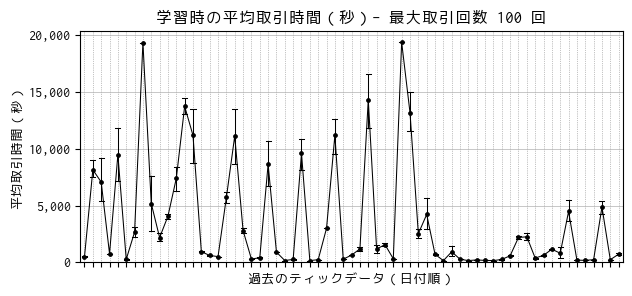

In [122]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.pointplot(
    data=df,
    x="date",
    y="ep_len_mean",
    linewidth=0.75,
    color="black",
    markersize=2.8,
    capsize=0.6,
    err_kws={"color": "black", "linewidth": 0.75},
    ax=ax,
)
ax.tick_params(axis="x", labelbottom=False)  # Remove x-axis tick labels
ax.set_xlabel("過去のティックデータ（日付順）")
ax.set_ylabel("平均取引時間（秒）")
y_min, y_max = ax.get_ylim()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylim(0, y_max)
ax.grid(axis="x", linewidth=0.5, color="#888", linestyle="dotted")
ax.grid(axis="y", linewidth=0.5)

ax.set_title("学習時の平均取引時間（秒）- 最大取引回数 100 回")
plt.savefig(path_png)
plt.show()